# Resources

https://www.kaggle.com/datasets/uppulurimadhuri/dataset
https://www.autismspeaks.org
https://www.crossrivertherapy.com/autism-statistics

#### Import Libraries

In [1]:
# Import libraries
import numpy as np
import os   
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
# Librerias de sklearn for several ML algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.inspection import permutation_importance
# Graphics plots
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

#### Get the data

In [2]:
# Load data
data_autism = pd.read_csv('../data/raw/data_csv.csv')

#### Data PreProcessing

In [3]:
data_autism.head() 

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,1,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,0,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [4]:
# Remove space 
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)
data_adult = trim_all_columns(data_autism)


In [5]:
# Convert categorical values ​​into numeric values ​​with labelEncoder function

def apply_labelEncoder(df):
  for var in df.columns:
    if df[var].dtype.name == 'object':
      le = LabelEncoder()
      df[var] = le.fit_transform(df[var])
  return df

In [6]:
# Number of entries and columns before cleaning
print(f"Dataset shape is {data_autism.shape}")

Dataset shape is (1985, 28)


In [7]:
data_autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [8]:
# check null values 
data_autism.isna().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [9]:
# Drop null values
data_autism.dropna(inplace=True)

In [10]:
data_autism.duplicated().sum()

0

In [11]:
data_autism.drop("CASE_NO_PATIENT'S",axis=1,inplace=True)

In [12]:
data_autism.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

#### Data visualization


In [13]:
# Create dataframe Ethnicity y ASD_traits
pd.crosstab(data_autism["Ethnicity"], data_autism["ASD_traits"])

ASD_traits,No,Yes
Ethnicity,,
Asian,80,271
Black,9,33
Hispanic,9,28
Latino,6,19
Middle Eastern,287,73
Mixed,3,4
Native Indian,0,2
Others,6,29
PaciFica,1,7


<AxesSubplot:title={'center':'ethnicity autism diagnosis'}, xlabel='ASD_traits', ylabel='Ethnicity'>

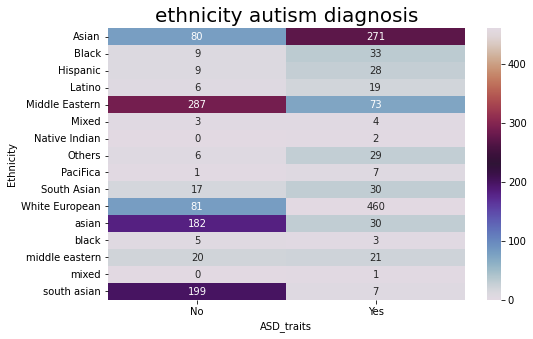

In [14]:
ct = pd.crosstab(data_autism["Ethnicity"], data_autism["ASD_traits"])

plt.figure(figsize = (8, 5))
plt.title("ethnicity autism diagnosis", fontsize = 20)
sns.heatmap(ct, cmap = "twilight", annot = True, cbar = True, fmt = "g")

Obcervamos que la gente Blanca tienen mas diagnosticados con autismo. En segundo lugar estan Asiaticos.
El CDC dice que las altas proporciones de prevalencia de autismo en niños blancos en comparación con otras etnias no se deben en realidad a que los niños blancos tengan más probabilidades de tener autismo.
A medida que ha mejorado el alcance a otras etnias, la prevalencia de diagnósticos entre grupos se ha vuelto mucho más uniforme.
No parece haber los estudios que indican de que los niños blancos tengan más probabilidades de desarrollar autismo que otros niños.

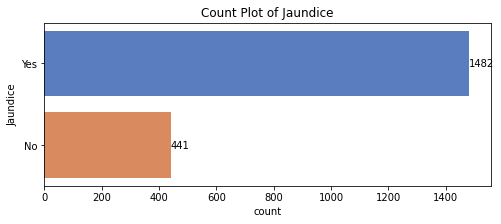

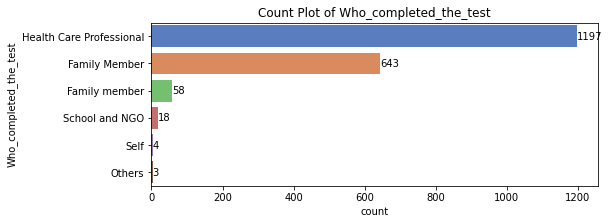

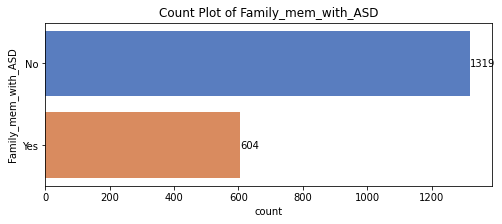

In [15]:
cntplot = ["Jaundice","Who_completed_the_test","Family_mem_with_ASD"]

for i in cntplot:
    plt.figure(figsize=(8,3))
    g = sns.countplot(y = i, data = data_autism,order = data_autism[i].value_counts().index, palette = "muted" )
    g.set_title("Count Plot of {}".format(i))
    g.bar_label(g.containers[0])
    plt.show()

Una combinación de factores genéticos y ambientales influye en el desarrollo del autismo.

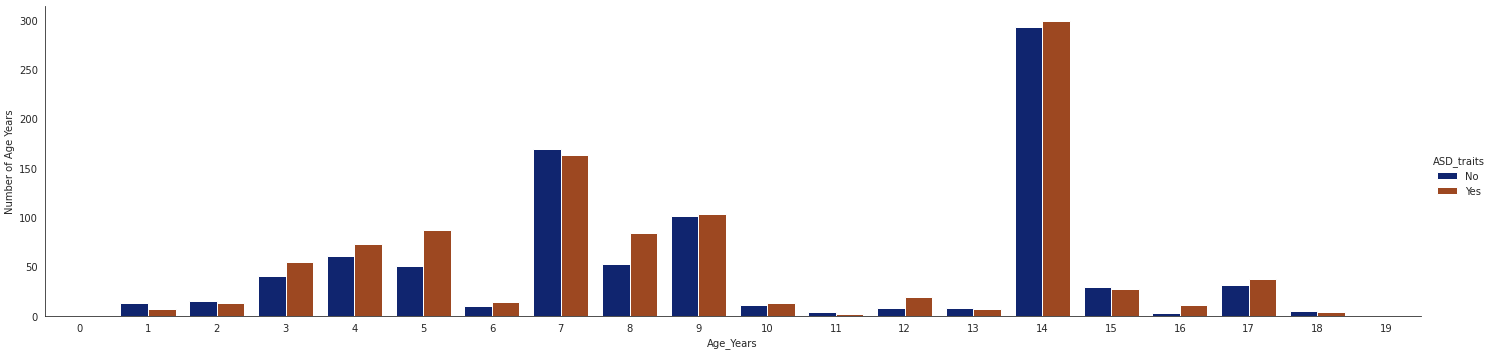

In [16]:
with sns.axes_style('white'):
    g = sns.catplot("Age_Years", data=data_autism, aspect=4.0, kind='count', palette='dark',
                       hue='ASD_traits', order=range(0, 20))
    g.set_ylabels('Number of Age Years')

Edad estudiada entre 1 año hasta 18 años. Los 3 años son muy importantes para detectar autismo.

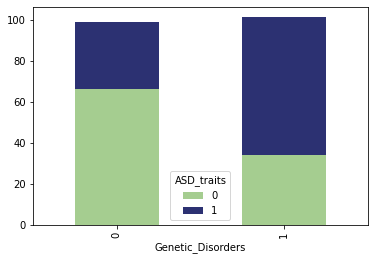

In [49]:
plot = pd.crosstab(index=data_autism['Genetic_Disorders'],
            columns=data_autism['ASD_traits']
                  ).apply(lambda x: x/x.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, cmap = 'crest')

Parece que trastorno genético afecta desarrolo de TEA. Enre Los que tenian trastorno genético han detectado mas niños con rasgos del autismo.

In [18]:
# Funcion labelEncouder
data_autism = apply_labelEncoder(data_autism)

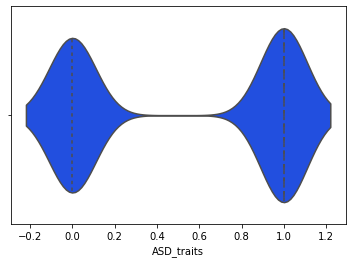

In [19]:
with sns.axes_style(style=None):
    sns.violinplot("ASD_traits", hue="Sex", data=data_autism,
                   split=True, inner="quartile",
                   palette= "bright");

Variable ASD_traits usaremos para prediction como variable de target. Y esta bastante balanceado

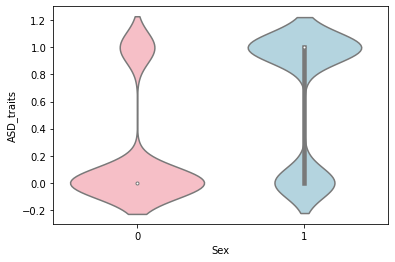

In [20]:
sns.violinplot("Sex","ASD_traits", data=data_autism,
               palette=["lightpink", "lightblue"]);

Masculino con ASD_pos esta con mas % que femenino. Los niños generalmente tienen cuatro veces más probabilidades de ser diagnosticados que las niñas, manteniéndose estable con respecto a informes anteriores hasta hoy. Esto indica la necesidad de más investigación para comprender la brecha en la prevalencia y garantizar que las niñas en el espectro reciban la atención que necesitan.

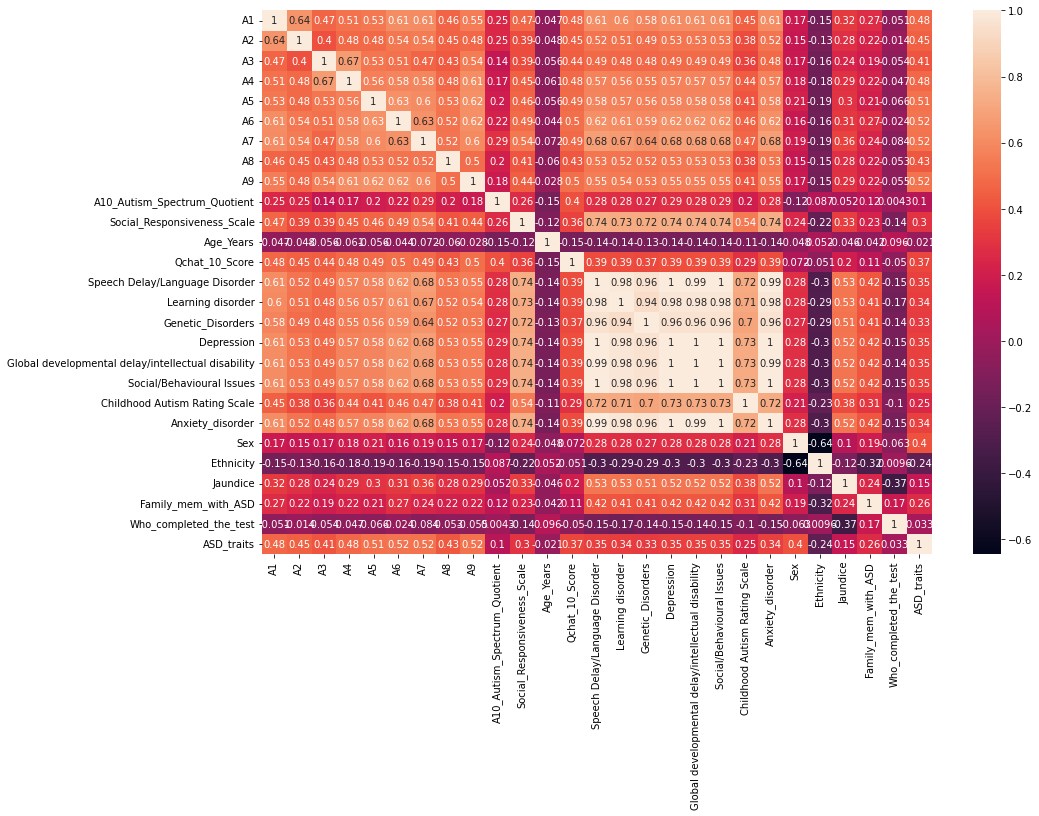

In [21]:
plt.figure(figsize=(15,10)) 
sns.heatmap(data_autism.corr(method='kendall'),annot=True)
plt.show()

Los variables (Speech delay/language disorder, learning disorder, Genetic disorder, depression, Global developmental delay, intellectual disability, Social/Behavioural issues, Anxiety disorder) son muy conrelacionadas.  
En este caso voy a dejar solo una variable que podria ser informativa  y resto los elimino.


In [22]:
# Drop correlated variable
data_autism_filter = data_autism.drop(['Learning disorder','Global developmental delay/intellectual disability','Speech Delay/Language Disorder','Genetic_Disorders','Depression','Anxiety_disorder'],axis=1)

#### Train Test Split
##### Logistic regression

In [23]:
traits = data_autism_filter['ASD_traits']
features = data_autism_filter.drop('ASD_traits', axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, traits, test_size=0.05, random_state=10)

In [25]:
lr = LogisticRegression(max_iter=1000)
# train the model.
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Generar prediccion
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1])

In [27]:
confusion_matrix(y_test,y_pred)

array([[40,  0],
       [ 1, 56]], dtype=int64)

In [28]:
accuracy_score(y_test,y_pred)

0.9896907216494846

In [29]:
# Coef of variables
log_odds = lr.coef_[0]
log_odds


array([ 1.80655511,  3.05781636,  1.76625414,  2.73830953,  2.67036527,
        2.85602356,  2.95280434,  2.80081212,  3.21267525,  0.71445016,
       -0.07756191,  0.01188754, -0.09556498, -7.07720463, -0.12666876,
        5.04754608,  0.26828593, -0.10734648,  2.46073816,  0.04377229])

In [30]:
odds = np.exp(log_odds)
odds

array([6.08943383e+00, 2.12810363e+01, 5.84890309e+00, 1.54608269e+01,
       1.44452446e+01, 1.73922300e+01, 1.91596086e+01, 1.64580072e+01,
       2.48454652e+01, 2.04306302e+00, 9.25369731e-01, 1.01195848e+00,
       9.08859299e-01, 8.44129508e-04, 8.81025452e-01, 1.55640067e+02,
       1.30772101e+00, 8.98214402e-01, 1.17134548e+01, 1.04474443e+00])

In [31]:
pd.DataFrame(odds, features.columns, columns=["coef"]).sort_values(by=['coef'],ascending=False)

,coef
Sex,155.640067
A9,24.845465
A2,21.281036
A7,19.159609
A6,17.392230
A8,16.458007
A4,15.460827
A5,14.445245
Family_mem_with_ASD,11.713455
A1,6.089434


En esta dataframe podemos apreciar coeficiente de genero es muy alto. Parece tiene un peso importante a la hora de detectar autismo.
Y al contrario Social/behavioural issues esta abajo de todo. En principio yo daba mucha importancia a este variable, como tenia mas conrelacion con otros variables en heatmap de Spearman. 

USAMOS MODELOS MAS COMPLEJOS PARA PREDECIR NUESTO VARIABLE (ADABOOST,SVM,RANDOM FOREST)

#### ADABOOST MODEL

In [32]:
ada = AdaBoostClassifier(n_estimators=60)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=60)

In [33]:
predictions_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_true=y_test, y_pred=predictions_ada)

In [34]:
print('Overal accuracy of ADA model using test-set is: %f' %(acc_ada*100))
print(classification_report(y_test, predictions_ada))
print(confusion_matrix(y_test,predictions_ada))

Overal accuracy of ADA model using test-set is: 97.938144
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.96      0.98        57

    accuracy                           0.98        97
   macro avg       0.98      0.98      0.98        97
weighted avg       0.98      0.98      0.98        97

[[40  0]
 [ 2 55]]


#### SVM MODEL

In [35]:
model_svm = SVC()
model_svm.fit(X_train,y_train)

SVC()

In [36]:
predictions_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_true=y_test, y_pred=predictions_svm)

In [37]:
print('Overal accuracy of SVM model using test-set is: %f' %(acc_svm*100))
print(classification_report(y_test, predictions_svm))
print(confusion_matrix(y_test,predictions_svm))

Overal accuracy of SVM model using test-set is: 84.536082
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        40
           1       0.96      0.77      0.85        57

    accuracy                           0.85        97
   macro avg       0.85      0.86      0.84        97
weighted avg       0.87      0.85      0.85        97

[[38  2]
 [13 44]]


#### RANDOM FOREST 

In [38]:
rfc = RandomForestClassifier(n_estimators=60)
rfc = rfc.fit(X_train,y_train)


In [39]:
predictions_rf = rfc.predict(X_test)


In [40]:
acc_rf = accuracy_score(y_true=y_test, y_pred=predictions_rf)
print('Overal accuracy of Random Forest model using test-set is: %f' %(acc_rf*100))

Overal accuracy of Random Forest model using test-set is: 100.000000


In [41]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        57

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



In [42]:
print(confusion_matrix(y_test,predictions_rf))

[[40  0]
 [ 0 57]]


[1.0, 0.979381443298969, 0.845360824742268]


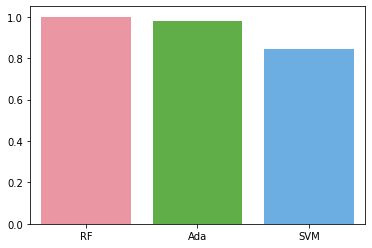

In [43]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
models = ['RF','Ada','SVM']
accuracy_score = [acc_rf, acc_ada, acc_svm]
print(accuracy_score)
sns.barplot(x=models, y=accuracy_score,)
plt.show()

Random Forest tiene mas capacidad de encontrar patrones complejos, consiguiendo un 100% de accuracy
        

Evaluamos la importancia de las características.
Las importancias de las características las proporciona el atributo ajustado feature_importances_ y se calculan como la media y la desviación estándar de la acumulación de la disminución de impurezas dentro de cada árbol.

In [44]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
std = std[np.argsort(importances)[::-1]] 

In [45]:
forest_importances = pd.DataFrame(importances, index=X_train.columns,columns=['coefic'])
forest_importances.sort_values(by='coefic', ascending=False, inplace=True) 

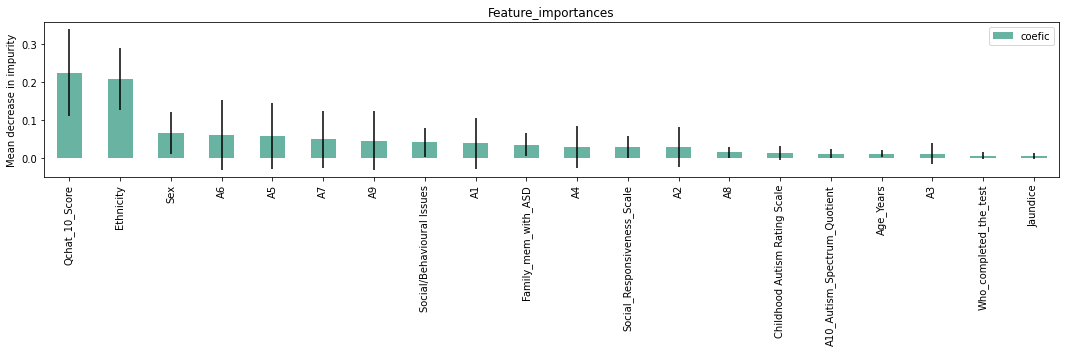

In [46]:
fig, ax = plt.subplots(figsize=(15,5))
forest_importances.plot.bar(ax=ax, yerr=std)
ax.set_title("Feature_importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

A pesar de que las variables categóricas de mas elementos salen las primeras en cuanto a presencia en los árboles, 
lo cual tiene sentido ya que hay mas posibilidad de trozearlas, si tenemos en cuenta la varianza de esa presencia,
la variable género  aparece la tercera en cuanto a presencia, los cual nos indica una gran importancia, ya que género es una variable binaria
Esto tiene sentido ya que lo habíamos comprobado anteriormente en el modelo de regresión logística, y también se puede comprobar visualmente

La importancia de las características basadas en la impureza puede ser engañosa para muchos valores únicos. Como alternativa a continuación usamos la importancia de la función de permutación.
Permutación es La acción de cambiar el arreglo, especialmente el orden lineal.


In [47]:
result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.DataFrame(result.importances_mean, index=X_train.columns,columns=['coefic'])

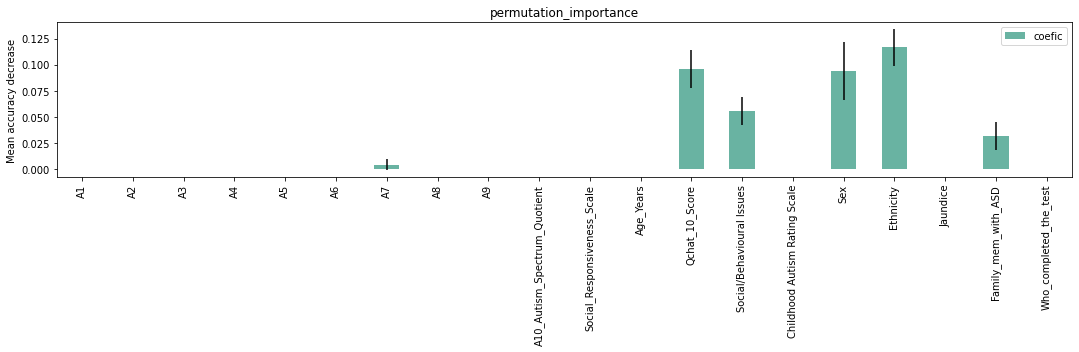

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("permutation_importance")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Las mismas características se detectan como las más importantes utilizando ambos métodos. Aunque las importancias relativas varían. 

CONCLUSIÓN:
comparando los resultados rf mejor modelo para predicción del TEA
Las técnicas de minería de datos podria ser alternativa a los métodos tradicionales. Con menos costo y corto tiempo de detección del autismo.